# ABSA Task

Restaurant Review Dataset

TODO: 
1. Learn Aspects
2. Find Aspects in Sentencens
3. Find Polarity for each Aspect

Model: 
a. Aspect Category Classifier
b. Sentiment Model

In [55]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer

# Tokanization

### Sentence tokanziation

In [56]:
text = """hello, my name is Nora. I hope I will soon be able to classify text. The weather is brilliant today. Corona is everywhere. I just want to go outside and do stuff. But I still do  but allone. But in generall people shouldn't go outside. once corona is over we can for sure go outside again. """

In [57]:
tokenized_sent = sent_tokenize(text)
print(tokenized_sent)

['hello, my name is Nora.', 'I hope I will soon be able to classify text.', 'The weather is brilliant today.', 'Corona is everywhere.', 'I just want to go outside and do stuff.', 'But I still do  but allone.', "But in generall people shouldn't go outside.", 'once corona is over we can for sure go outside again.']


### Word tokanization

In [58]:
tokenized_word = word_tokenize(text)
print(tokenized_word)

['hello', ',', 'my', 'name', 'is', 'Nora', '.', 'I', 'hope', 'I', 'will', 'soon', 'be', 'able', 'to', 'classify', 'text', '.', 'The', 'weather', 'is', 'brilliant', 'today', '.', 'Corona', 'is', 'everywhere', '.', 'I', 'just', 'want', 'to', 'go', 'outside', 'and', 'do', 'stuff', '.', 'But', 'I', 'still', 'do', 'but', 'allone', '.', 'But', 'in', 'generall', 'people', 'should', "n't", 'go', 'outside', '.', 'once', 'corona', 'is', 'over', 'we', 'can', 'for', 'sure', 'go', 'outside', 'again', '.']


In [66]:
sent_list = []
for s in tokenized_sent:
    sent_list.append(word_tokenize(s))

print(sent_list)

[['hello', ',', 'my', 'name', 'is', 'Nora', '.'], ['I', 'hope', 'I', 'will', 'soon', 'be', 'able', 'to', 'classify', 'text', '.'], ['The', 'weather', 'is', 'brilliant', 'today', '.'], ['Corona', 'is', 'everywhere', '.'], ['I', 'just', 'want', 'to', 'go', 'outside', 'and', 'do', 'stuff', '.'], ['But', 'I', 'still', 'do', 'but', 'allone', '.'], ['But', 'in', 'generall', 'people', 'should', "n't", 'go', 'outside', '.'], ['once', 'corona', 'is', 'over', 'we', 'can', 'for', 'sure', 'go', 'outside', 'again', '.']]


### Frequency Distribution

In [59]:
fqdistr = FreqDist(tokenized_word)
print(fqdistr)

<FreqDist with 46 samples and 66 outcomes>


In [60]:
fqdistr.most_common(5)

[('.', 8), ('is', 4), ('I', 4), ('go', 3), ('outside', 3)]

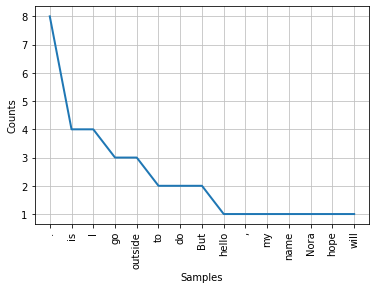

In [61]:
fqdistr.plot(15, cumulative=False)
plt.show()

## Stopwords

In [62]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
print(stop_words)

{'not', 'during', 've', 'ourselves', 'their', 'aren', 'me', 'who', 'does', "isn't", 'd', 'these', "wasn't", 'in', 'very', 'himself', "you're", 'having', 'then', 'each', 'shan', 'from', 'here', 'some', 'all', "weren't", 'been', 'had', "wouldn't", 'most', 'with', 'or', 'when', 'o', 'couldn', 'they', 'hasn', 'of', 'where', 'which', 'both', 'down', 'she', 'hadn', "you'll", 'doing', 'there', 'themselves', 'he', 'between', 'mightn', 'theirs', 'by', 'own', 's', 'i', 'am', "that'll", 'further', 'shouldn', 'your', 'hers', 'y', 'about', 'this', "don't", 'that', 'herself', 'just', 'will', 'after', 'can', 'while', 'yourself', 'nor', 'should', 'my', 'off', 'ours', "you've", 'its', 'it', 'other', "you'd", 'into', 'as', 'but', 'than', 'her', 'don', 'was', "it's", 'same', 'needn', "didn't", 'at', 'yours', 'we', 'him', 'more', "should've", 'why', 'have', 'being', 'you', 'them', 'wasn', 'to', 'are', 'the', 'ain', 'a', 'over', 'if', 'weren', 'ma', 'once', 'wouldn', 'few', 'what', 'his', 'yourselves', 'ag

[nltk_data] Downloading package stopwords to /home/nora/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Filter Stopwords 

In [71]:

filtered_sent = []
for s in sent_list:
    for w in stop_words: 
        if w in s:
            filtered_sent.append(s.remove(w))
print("Tokenized Sentence:",tokenized_sent, "\n")
print("Filterd Sentence:",filtered_sent)

filtered = []
# for sentence in all sentences
  # for all stop_words
      # sentence  = remove stop word from sentence
  # filtered.append(sentence)

Tokenized Sentence: ['hello, my name is Nora.', 'I hope I will soon be able to classify text.', 'The weather is brilliant today.', 'Corona is everywhere.', 'I just want to go outside and do stuff.', 'But I still do  but allone.', "But in generall people shouldn't go outside.", 'once corona is over we can for sure go outside again.'] 

Filterd Sentence: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [83]:
fqdistr = FreqDist(filtered_sent)
print(fqdistr)

<FreqDist with 8 samples and 8 outcomes>


### Stemming - linguistic normalization

In [86]:
ps = PorterStemmer ()

In [90]:
stemmed_words = []
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
    
print("Filtered Sentence:",filtered_sent, "\n")
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['hello, my name is Nora.', 'I hope I will soon be able to classify text.', 'The weather is brilliant today.', 'Corona is everywhere.', 'I just want to go outside and do stuff.', 'But I still do  but allone.', "But in generall people shouldn't go outside.", 'once corona is over we can for sure go outside again.'] 

Stemmed Sentence: ['hello, my name is nora.', 'i hope i will soon be able to classify text.', 'the weather is brilliant today.', 'corona is everywhere.', 'i just want to go outside and do stuff.', 'but i still do  but allone.', "but in generall people shouldn't go outside.", 'once corona is over we can for sure go outside again.']


# Text Classification

## 1. Dataset

Sentiment Analysis of Movie Reivews form Kaggle
Columns:
1. PhraseId
2. SentenceId
3. Phrase
4. Sentiment

5 Sentiment Labels: 0 - negative to 4 - positive

In [101]:
# load datase
data = pd.read_csv('train.tsv', sep='\t')

In [94]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [97]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

#### Data Vizualizations

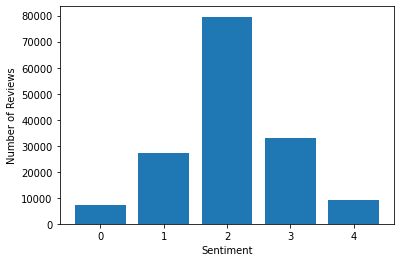

In [104]:
sentiment_count = data.groupby('Sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['Phrase'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

## 2. Feature Generation
### 2.1 Bag of Words

In [106]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [122]:
print(text_counts[:1])

  (0, 11671)	1
  (0, 4517)	1
  (0, 3444)	1
  (0, 294)	1
  (0, 5735)	2
  (0, 5751)	1
  (0, 5512)	1
  (0, 9065)	1
  (0, 593)	1
  (0, 584)	1
  (0, 12673)	1


In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [117]:
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, predicted))

Accuracy:  0.6049169122986885


### 2.2 Term Frequency - Inverse Document Frequency
The problem with BOW, where we count the number of words in each document (term frequency) is that longer sentences will have more weight to longer documents. 

Inverse Document Frequency measures the amount of information a word provides in the document. log scaled inverse ration of the number of documents that contain the word ant the toal number of documents.

In [120]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Phrase'])

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=1)

In [126]:
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, predicted))

Accuracy:  0.5853090691614337


# PLAN
## Models

- LSTM 
- CNN
- Bert

## Dataset
- IMDB
- MR



In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [5]:
model = Sequential()

https://towardsdatascience.com/recurrent-neural-networks-by-example-in-python-ffd204f99470
LTSM:
    recurrent network means the current time step becomes the input to the next time step.
    at each element of the sequence, the model considers not sjust the current input, but what it remeers about the preceding elements.
    
    This allows the network to learn long-term dependencies in a wequence which means it can take the entire context into account when making a prediction.
 
At the heart of an RNN is a layer made of memory cells. The most popular cell at the moment is the Long Short-Term Memory (LSTM) which maintains a cell state as well as a carry for ensuring that the signal (information in the form of a gradient) is not lost as the sequence is processed. At each time step the LSTM considers the current word, the carry, and the cell state.
    

## Dataset

In [13]:
df = pd.read_csv('input/spam.csv', delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [15]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


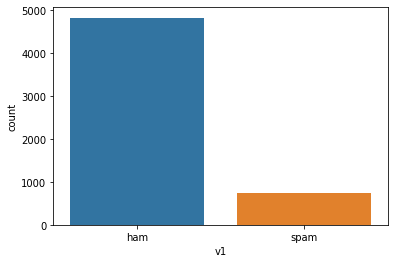

In [18]:
sns.countplot(df.v1)


### input & output vectors

In [24]:
Y = df.v1
X = df.v2

le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

### Splitting into train & test set

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.15, random_state=1)

In [28]:
print('Train: ', len(X_train), "\n", "Test: ", len(X_test))

Train:  4736 
 Test:  836


### Data Processing

In [47]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [40]:
!export CUDA_VISIBLE_DEVICES=1

In [41]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [45]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

### fit on training data

In [48]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 4s 1ms/step - loss: 0.3368 - accuracy: 0.8772 - val_loss: 0.1434 - val_accuracy: 0.9705
Epoch 2/10
3788/3788 [==============================] - 4s 1ms/step - loss: 0.1026 - accuracy: 0.9757 - val_loss: 0.0500 - val_accuracy: 0.9863
Epoch 3/10
3788/3788 [==============================] - 4s 1ms/step - loss: 0.0520 - accuracy: 0.9857 - val_loss: 0.0549 - val_accuracy: 0.9810


## Process on Test Set :D

In [50]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [51]:
accuracy = model.evaluate(test_sequences_matrix, Y_test)

836/836 [==============================] - 1s 653us/step


In [53]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy[0],accuracy[1]))

Test set
  Loss: 0.062
  Accuracy: 0.977
